In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline


In [2]:
df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
# df = pd.read_excel("Topics_keywords.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword,star_number
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach...",336k
1,996icu/996.ICU,[],260k
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha...",213k
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'...",199k
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']",191k
5,facebook/react,"['react', 'javascript', 'library', 'ui', 'fron...",178k
6,kamranahmedse/developer-roadmap,"['computer-science', 'engineering', 'roadmap',...",177k
7,sindresorhus/awesome,"['lists', 'awesome', 'unicorns', 'resources', ...",177k
8,public-apis/public-apis,"['api', 'list', 'development', 'public', 'reso...",169k
9,tensorflow/tensorflow,"['python', 'machine-learning', 'deep-neural-ne...",161k


In [3]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [4]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


[('interview', 13),
 ('algorithm', 9),
 ('javascript', 8),
 ('python', 8),
 ('programming', 5),
 ('computer-science', 5),
 ('web', 5),
 ('system', 5),
 ('education', 4),
 ('hacktoberfest', 4),
 ('awesome', 4),
 ('free', 3),
 ('frontend', 3),
 ('api', 3),
 ('vision', 3),
 ('style', 3),
 ('react', 2),
 ('curriculum', 2),
 ('learn-to-code', 2),
 ('list', 2),
 ('data', 2),
 ('software', 2),
 ('study-plan', 2),
 ('resources', 2),
 ('development', 2),
 ('machinelearning', 2),
 ('neural', 2),
 ('css', 2),
 ('design', 2),
 ('es6', 2),
 ('es2015', 2),
 ('material', 2),
 ('java', 2),
 ('zsh', 2),
 ('git', 2),
 ('sort', 2),
 ('nodejs', 1),
 ('d3', 1),
 ('teachers', 1),
 ('community', 1),
 ('math', 1),
 ('nonprofits', 1),
 ('careers', 1),
 ('certificate', 1),
 ('books', 1),
 ('resource', 1),
 ('framework', 1),
 ('vue', 1),
 ('library', 1),
 ('ui', 1),
 ('declarative', 1),
 ('engineering', 1),
 ('roadmap', 1),
 ('developer-roadmap', 1),
 ('devops', 1),
 ('backend-roadmap', 1),
 ('lists', 1),
 ('uni

In [5]:
topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list

['interview',
 'algorithm',
 'javascript',
 'python',
 'programming',
 'computer-science',
 'web']

In [6]:
df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

['react nodejs javascript d3 teachers community education programming curriculum math free learn-to-code nonprofits careers certificate hacktoberfest',
 '',
 'education list books resource hacktoberfest',
 'computer-science algorithm algorithm interview data software interview study-plan interview interview interview programming',
 'javascript framework vue frontend',
 'react javascript library ui frontend declarative',
 'computer-science engineering roadmap study-plan developer-roadmap devops frontend backend-roadmap',
 'lists awesome unicorns resources awesome',
 'api list development public resources dataset free software api api',
 'python machinelearning neural deep-learning neural tensorflow machinelearning distributed',
 'javascript css html sass bootstrap scss css',
 'python design development programming web system design interview web web interview interview system',
 'javascript education programming es6 async book book-series es2015 learn-to-code training-providers closures

In [7]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 30, feature 7)


/Users/seop/miniforge3/envs/jiseopy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0.        , 0.        , 0.        , 0.6652944 , 0.74658111,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.37031936, 0.18515968, 0.87178624, 0.        , 0.18515968,
        0.        , 0.18515968],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0. 

In [8]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df['project_name'])
tfidf_vector_df

,algorithm,computer,interview,javascript,programming,python,science
project_name,,,,,,,
freeCodeCamp/freeCodeCamp,0.000000,0.000000,0.000000,0.665294,0.746581,0.000000,0.000000
996icu/996.ICU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EbookFoundation/free-programming-books,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
jwasham/coding-interview-university,0.370319,0.185160,0.871786,0.000000,0.185160,0.000000,0.185160
vuejs/vue,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
facebook/react,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
kamranahmedse/developer-roadmap,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.707107
sindresorhus/awesome,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
public-apis/public-apis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
#tfidf_vector_df.to_excel("TF-IDF_Vector.xlsx",index=False)

In [14]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=2)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2
project_name,,
freeCodeCamp/freeCodeCamp,0.623575,0.099711
996icu/996.ICU,-0.063050,-0.244898
EbookFoundation/free-programming-books,-0.063050,-0.244898
jwasham/coding-interview-university,-0.461483,0.600517
vuejs/vue,0.764253,0.203023
facebook/react,0.764253,0.203023
kamranahmedse/developer-roadmap,-0.302973,-0.024917
sindresorhus/awesome,-0.063050,-0.244898
public-apis/public-apis,-0.063050,-0.244898


In [15]:
# TF-IDF Vector의 모양
df_pca.shape

(30, 2)

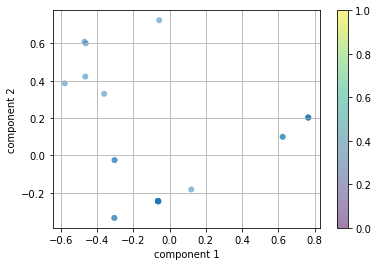

In [16]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [17]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
pca.explained_variance_ratio_.sum()

0.5364127337539002

In [18]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

5

In [19]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.160814,0.329989,0.329989
pca2,0.100596,0.206423,0.536413


In [20]:
df_pca

,pca1,pca2
project_name,,
freeCodeCamp/freeCodeCamp,0.623575,0.099711
996icu/996.ICU,-0.063050,-0.244898
EbookFoundation/free-programming-books,-0.063050,-0.244898
jwasham/coding-interview-university,-0.461483,0.600517
vuejs/vue,0.764253,0.203023
facebook/react,0.764253,0.203023
kamranahmedse/developer-roadmap,-0.302973,-0.024917
sindresorhus/awesome,-0.063050,-0.244898
public-apis/public-apis,-0.063050,-0.244898


## DBSCAN
https://hoonzi-text.tistory.com/19

https://bcho.tistory.com/1205

In [21]:
model = DBSCAN(eps=0.4, min_samples=5, metric='cosine') # parameter 값 재설정 필요

result = model.fit_predict(df_pca)
set(result)

{0, 1}

In [22]:
# -1은 Noise 데이터를 의미 : 핵심 데이터도 아니며, 외곽 데이터도 아닌 데이터들
# 0은 외곽 데이터를 의미 : 핵심 데이터는 아니지만, 어떠한 데이터의 이웃 데이터들

df_result = df.copy()
df_result['result'] = result
a = 0
for i in df_result['result']:
    if i == -1:
        a = a + 1
print(a) # 노이즈 데이터의 개수

b = 0
for i in df_result['result']:
    if i == 0:
        b = b + 1
print(b) # 외곽 데이터의 개수

0
6


In [23]:
j = 0
keyword = []
topic = []
num = []

for cluster_num in set(result):
    
    if(cluster_num == -1 or cluster_num == 0):
        continue # 노이즈 데이터들은 버림
    else:
        print('cluster num : {}'.format(cluster_num))
        temp_df = df_result[df_result['result'] == cluster_num]       
        
        i = 0
        
        for k in temp_df['topic_keyword_str']:
            keyword.append(k)
            num.append(cluster_num)
            i = i + 1
        print('군집 내 데이터 개수: ',i)
        
        for t in temp_df['project_name']:
            topic.append(t)
    j += i
    #print(j)
    print()
dic_cluster = {}
dic_cluster['topic'] = topic
dic_cluster['keyword'] = keyword
dic_cluster['number'] = num

cluster num : 1
군집 내 데이터 개수:  24



In [24]:
dic_cluster

{'topic': ['996icu/996.ICU',
  'EbookFoundation/free-programming-books',
  'jwasham/coding-interview-university',
  'kamranahmedse/developer-roadmap',
  'sindresorhus/awesome',
  'public-apis/public-apis',
  'tensorflow/tensorflow',
  'donnemartin/system-design-primer',
  'CyC2018/CS-Notes',
  'ohmyzsh/ohmyzsh',
  'flutter/flutter',
  'trekhleb/javascript-algorithms',
  'github/gitignore',
  'microsoft/vscode',
  'TheAlgorithms/Python',
  'danistefanovic/build-your-own-x',
  'torvalds/linux',
  'Snailclimb/JavaGuide',
  'jackfrued/Python-100-Days',
  'vinta/awesome-python',
  'ytdl-org/youtube-dl',
  'ossu/computer-science',
  'facebook/react-native',
  'd3/d3'],
 'keyword': ['',
  'education list books resource hacktoberfest',
  'computer-science algorithm algorithm interview data software interview study-plan interview interview interview programming',
  'computer-science engineering roadmap study-plan developer-roadmap devops frontend backend-roadmap',
  'lists awesome unicorns reso

In [25]:
df_cluster = pd.DataFrame(dic_cluster)
df_cluster

,topic,keyword,number
0,996icu/996.ICU,,1
1,EbookFoundation/free-programming-books,education list books resource hacktoberfest,1
2,jwasham/coding-interview-university,computer-science algorithm algorithm interview...,1
3,kamranahmedse/developer-roadmap,computer-science engineering roadmap study-pla...,1
4,sindresorhus/awesome,lists awesome unicorns resources awesome,1
5,public-apis/public-apis,api list development public resources dataset ...,1
6,tensorflow/tensorflow,python machinelearning neural deep-learning ne...,1
7,donnemartin/system-design-primer,python design development programming web syst...,1
8,CyC2018/CS-Notes,python java computer-science algorithm leetcod...,1
9,ohmyzsh/ohmyzsh,shell theme zsh cli productivity terminal plug...,1


In [26]:
clusters = {}
keywords = {}

num = []
for i in set(df_cluster['number']):
    n = 0
    cluster = []
    keyword = []
    for j in df_cluster.values:
        if j[2] == i:
            cluster.append(j[0])
            clusters[i] = cluster
            keyword += j[1].split(' ')
            n += 1
            
            
#             print(keyword)
        else:
            pass
        
        keywords[i] = keyword
    num.append(n)

# print(num)
count_items = []


for i in keywords.values():
    count = {}
    for j in i:
        try:
            count[j] += 1
        except:
            count[j] = 1
    val = sorted(count.items(), key=lambda x: x[1], reverse=True)
    count_items.append(val[:15]) 

df_cluster_ = pd.DataFrame()
df_cluster_['clusters'] = clusters.values()
# clusters.values()
df_cluster_['cluster_num'] = clusters.keys()
df_cluster_['count'] = num
df_cluster_['top_15_topics'] = count_items
df_cluster_

,clusters,cluster_num,count,top_15_topics
0,"[996icu/996.ICU, EbookFoundation/free-programm...",1,24,"[(interview, 13), (algorithm, 9), (python, 8),..."


### 시각화
https://m.blog.naver.com/samsjang/221023672149

In [27]:
style.use('seaborn-talk')
krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] == False
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

X = df_pca
y = result
c = ['b','g','r','c','m','y','k']
for i in range(-1, sorted(result)[-1]+1):
    plt.scatter(X[y==i]['pca1'], X[y==i]['pca2'] , c=c[i%7], s=40, label='클러스터{}'.format(i))
plt.title('클러스터링 결과')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/seop/파이썬/깃허브크롤링/github_분석/01. RepoAnalysis_based_star/C:/Windows/Fonts/NGULIM.TTF'

## cluster_num = 1인 데이터들 대상으로 한번 더 차원 축소 후 클러스터링 진행

In [28]:
tfidf_vector_df

,algorithm,computer,interview,javascript,programming,python,science
project_name,,,,,,,
freeCodeCamp/freeCodeCamp,0.000000,0.000000,0.000000,0.665294,0.746581,0.000000,0.000000
996icu/996.ICU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EbookFoundation/free-programming-books,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
jwasham/coding-interview-university,0.370319,0.185160,0.871786,0.000000,0.185160,0.000000,0.185160
vuejs/vue,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
facebook/react,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
kamranahmedse/developer-roadmap,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.707107
sindresorhus/awesome,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
public-apis/public-apis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
# df_pca2 = pd.DataFrame()
num_list = []
for idx, num in enumerate(result):
    if num == 1:
        num_list.append(df_pca.iloc[idx])
    df_result2 = df_result[df_result['result'] == 1]
df_pca2 = pd.DataFrame(num_list)
df_pca2 = df_pca2.loc[~df_pca2.index.duplicated(keep='first')]
df_pca2

,pca1,pca2
996icu/996.ICU,-0.063050,-0.244898
EbookFoundation/free-programming-books,-0.063050,-0.244898
jwasham/coding-interview-university,-0.461483,0.600517
kamranahmedse/developer-roadmap,-0.302973,-0.024917
sindresorhus/awesome,-0.063050,-0.244898
public-apis/public-apis,-0.063050,-0.244898
tensorflow/tensorflow,-0.304174,-0.334748
donnemartin/system-design-primer,-0.360528,0.330198
CyC2018/CS-Notes,-0.577555,0.386287
ohmyzsh/ohmyzsh,-0.063050,-0.244898


In [30]:
# tfidf_vector_df[tfidf_vector_df.index==df_pca2.index]

tfidf_vector_df2 = pd.merge(tfidf_vector_df, df_pca2, left_index=True, right_index=True, how='inner', sort=False)

tfidf_vector_df2.drop(tfidf_vector_df2.iloc[:,217:], axis=1, inplace=True)
tfidf_vector_df2.loc[~tfidf_vector_df2.index.duplicated(keep='first')]
tfidf_vector_df2

,algorithm,computer,interview,javascript,programming,python,science,pca1,pca2
996icu/996.ICU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.063050,-0.244898
EbookFoundation/free-programming-books,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.063050,-0.244898
jwasham/coding-interview-university,0.370319,0.185160,0.871786,0.000000,0.185160,0.000000,0.185160,-0.461483,0.600517
kamranahmedse/developer-roadmap,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.707107,-0.302973,-0.024917
sindresorhus/awesome,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.063050,-0.244898
public-apis/public-apis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.063050,-0.244898
tensorflow/tensorflow,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.304174,-0.334748
donnemartin/system-design-primer,0.000000,0.000000,0.894209,0.000000,0.316537,0.316537,0.000000,-0.360528,0.330198
CyC2018/CS-Notes,0.452367,0.452367,0.425976,0.000000,0.000000,0.452367,0.452367,-0.577555,0.386287
ohmyzsh/ohmyzsh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.063050,-0.244898


In [31]:
ca = PCA(n_components=155)
df_pca2 = pca.fit_transform(tfidf_vector_df2)
df_pca2 = pd.DataFrame(df_pca2, index=tfidf_vector_df2.index,
                      columns=[f"pca{num+1}" for num in range(df_pca2.shape[1])])

df_pca2

,pca1,pca2
996icu/996.ICU,-0.331751,-0.064455
EbookFoundation/free-programming-books,-0.331751,-0.064455
jwasham/coding-interview-university,0.989683,-0.070249
kamranahmedse/developer-roadmap,0.089976,-0.554006
sindresorhus/awesome,-0.331751,-0.064455
public-apis/public-apis,-0.331751,-0.064455
tensorflow/tensorflow,-0.297282,0.804795
donnemartin/system-design-primer,0.590182,0.291569
CyC2018/CS-Notes,0.781974,0.107305
ohmyzsh/ohmyzsh,-0.331751,-0.064455


In [32]:
model2 = DBSCAN(eps=0.3, min_samples=5, metric='cosine') # parameter 값 재설정 필요

result2 = model2.fit_predict(df_pca2)
set(result2)

{-1, 0, 1}

In [33]:
df_result2['result2'] = result2

a = 0
for i in df_result2['result2']:
    if i == -1:
        a = a + 1
print(a) # 노이즈 데이터의 개수

b = 0
for i in df_result2['result2']:
    if i == 0:
        b = b + 1
print(b) # 외곽 데이터의 개수

4
14


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_23402/135387134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result2['result2'] = result2


In [34]:
j = 0
keyword = []
topic = []
num = []

for cluster_num in set(result2):
    
    if(cluster_num == -1 or cluster_num == 0):
        continue # 노이즈 데이터들은 버림
    else:
        print('cluster num : {}'.format(cluster_num))
        temp_df2 = df_result2[df_result2['result2'] == cluster_num]       
        
        i = 0
        
        for k in temp_df2['topic_keyword_str']:
            keyword.append(k)
            num.append(cluster_num)
            i = i + 1
        print('군집 내 데이터 개수: ',i)
        
        for t in temp_df2['project_name']:
            topic.append(t)
            
    j += i
    #print(j)
    print()

dic_cluster2 = {}
dic_cluster2['topic'] = topic
dic_cluster2['keyword'] = keyword
dic_cluster2['number'] = num

cluster num : 1
군집 내 데이터 개수:  6



In [35]:
df_cluster2 = pd.DataFrame(dic_cluster2)
df_cluster2

,topic,keyword,number
0,jwasham/coding-interview-university,computer-science algorithm algorithm interview...,1
1,donnemartin/system-design-primer,python design development programming web syst...,1
2,CyC2018/CS-Notes,python java computer-science algorithm leetcod...,1
3,trekhleb/javascript-algorithms,javascript computer-science algorithm algorith...,1
4,TheAlgorithms/Python,python education algorithm practice interview ...,1
5,Snailclimb/JavaGuide,sql java redis spring system algorithm jvm int...,1


In [36]:
clusters2 = {}
keywords2 = {}
num = []

for i in set(df_cluster2['number']):
    n = 0
    cluster = []
    keyword = []
    for j in df_cluster2.values:
        if j[2] == i:
            cluster.append(j[0])
            clusters2[i] = cluster
            keyword += j[1].split(' ')
            n += 1
#             print(keyword)
        else:
            pass
        
        keywords2[i] = keyword
    num.append(n)
# print(num)


count_items2 = []

for i in keywords2.values():
    count = {}
    for j in i:
        try:
            count[j] += 1
        except:
            count[j] = 1
    val = sorted(count.items(), key=lambda x: x[1], reverse=True)
    count_items2.append(val[:15]) 

df_cluster_2 = pd.DataFrame()
df_cluster_2['clusters'] = clusters2.values()
df_cluster_2['cluster_num'] = clusters2.keys()
df_cluster_2['count'] = num
df_cluster_2['top_15_topics'] = count_items2
df_cluster_2

,clusters,cluster_num,count,top_15_topics
0,"[jwasham/coding-interview-university, donnemar...",1,6,"[(interview, 13), (algorithm, 9), (system, 5),..."


### 시각화

https://m.blog.naver.com/samsjang/221023672149

In [37]:
style.use('seaborn-talk')
krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] == False
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

X = df_pca2
y = result2
c = ['b','g','r','c','m','y','k']
for i in range(-1, sorted(result2)[-1]+1):
    # pca 2개 선택
    plt.scatter(X[y==i]['pca2'], X[y==i]['pca3'] , c=c[i%7], s=40, label='클러스터{}'.format(i))
plt.title('클러스터링 결과')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/seop/파이썬/깃허브크롤링/github_분석/01. RepoAnalysis_based_star/C:/Windows/Fonts/NGULIM.TTF'

In [38]:
# 177개 pca 다시

## cluster_num = 1인 데이터들 대상으로 차원축소 하지 않고 클러스터링 진행

In [39]:
# df_pca2 = pd.DataFrame()
num_list = []
for idx, num in enumerate(result):
    if num == 1:
        num_list.append(df_pca.iloc[idx])
    df_result2_ = df_result[df_result['result'] == 1]
df_pca2_ = pd.DataFrame(num_list)
# df_pca2_ = df_pca2_.loc[~df_pca2_.index.duplicated(keep='first')]
df_pca2_

,pca1,pca2
996icu/996.ICU,-0.063050,-0.244898
EbookFoundation/free-programming-books,-0.063050,-0.244898
jwasham/coding-interview-university,-0.461483,0.600517
kamranahmedse/developer-roadmap,-0.302973,-0.024917
sindresorhus/awesome,-0.063050,-0.244898
public-apis/public-apis,-0.063050,-0.244898
tensorflow/tensorflow,-0.304174,-0.334748
donnemartin/system-design-primer,-0.360528,0.330198
CyC2018/CS-Notes,-0.577555,0.386287
ohmyzsh/ohmyzsh,-0.063050,-0.244898


In [40]:
model2_ = DBSCAN(eps=0.3, min_samples=5, metric='cosine') # parameter 값 재설정 필요

result2_ = model2_.fit_predict(df_pca2_)
set(result2_)

{-1, 0}

In [41]:
df_result2_['result2'] = result2_

a = 0
for i in df_result2_['result2']:
    if i == -1:
        a = a + 1
print(a) # 노이즈 데이터의 개수

b = 0
for i in df_result2_['result2']:
    if i == 0:
        b = b + 1
print(b) # 외곽 데이터의 개수

1
23


/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_23402/4242768105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result2_['result2'] = result2_


In [42]:
j = 0
keyword = []
topic = []
num = []

for cluster_num in set(result2_):
    
    if(cluster_num == -1 or cluster_num == 0):
        continue # 노이즈 데이터들은 버림
    else:
        print('cluster num : {}'.format(cluster_num))
        temp_df2_ = df_result2_[df_result2_['result2'] == cluster_num]       
        
        i = 0
        
        for k in temp_df2_['topic_keyword_str']:
            keyword.append(k)
            num.append(cluster_num)
            i = i + 1
        print('군집 내 데이터 개수: ',i)
        
        for t in temp_df2_['project_name']:
            topic.append(t)
            
    j += i
    #print(j)
    print()

dic_cluster2_ = {}
dic_cluster2_['topic'] = topic
dic_cluster2_['keyword'] = keyword
dic_cluster2_['number'] = num

In [43]:
df_cluster2_ = pd.DataFrame(dic_cluster2_)
df_cluster2_

,topic,keyword,number


In [44]:
clusters2_ = {}
keywords2_ = {}
num = []

for i in set(df_cluster2_['number']):
    n = 0
    cluster = []
    keyword = []
    for j in df_cluster2_.values:
        if j[2] == i:
            cluster.append(j[0])
            clusters2_[i] = cluster
            keyword += j[1].split(' ')
            n += 1
#             print(keyword)
        else:
            pass
        
        keywords2_[i] = keyword
    num.append(n)
# print(num)

count_items2_ = []

for i in keywords2_.values():
    count = {}
    for j in i:
        try:
            count[j] += 1
        except:
            count[j] = 1
    val = sorted(count.items(), key=lambda x: x[1], reverse=True)
    count_items2_.append(val[:15]) 

df_cluster_2_ = pd.DataFrame()
df_cluster_2_['clusters'] = clusters2_.values()
# clusters.values()
df_cluster_2_['cluster_num'] = clusters2_.keys()
df_cluster_2_['count'] = num
df_cluster_2_['top_15_topics'] = count_items2_
df_cluster_2_

,clusters,cluster_num,count,top_15_topics


In [45]:
style.use('seaborn-talk')
krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] == False
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

X = df_pca2_
y = result2_
c = ['b','g','r','c','m','y','k']
for i in range(-1, sorted(result2_)[-1]+1):
    # pca 2개 선택
    plt.scatter(X[y==i]['pca1'], X[y==i]['pca2'] , c=c[i%7], s=40, label='클러스터{}'.format(i))
plt.title('클러스터링 결과')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/seop/파이썬/깃허브크롤링/github_분석/01. RepoAnalysis_based_star/C:/Windows/Fonts/NGULIM.TTF'

In [46]:
# df_cluster.to_excel('first_cluster.xlsx')
# # 첫번째 DBSCAN 클러스터링 결과

# df_cluster2.to_excel('second_cluster_pca.xlsx')
# # 첫번째 결과에서 cluster_num=1인 데이터들을 다시 기존 데이터에서 차원축소 한 후 클러스터링

# df_cluster2_.to_excel('second_cluster_not_pca.xlsx')
# # 첫번째 결과에서 cluster_num=1인 데이터들을 차원축소 하지 않고 클러스터링

In [47]:
df_cluster_.to_excel('first_clustering.xlsx')
# 첫번째 DBSCAN 클러스터링 결과

df_cluster_2.to_excel('second_clustering(차원축소).xlsx')
# 첫번째 결과에서 cluster_num=1인 데이터들을 다시 기존 데이터에서 차원축소 한 후 클러스터링

df_cluster_2_.to_excel('second_clustering(차원축소x).xlsx')
# 첫번째 결과에서 cluster_num=1인 데이터들을 차원축소 하지 않고 클러스터링